In [1]:
import pandas as pd

data = pd.read_csv('bank-additional-full.csv', sep=';')
print(data.head())
print(data.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [3]:
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
print(data['y'].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


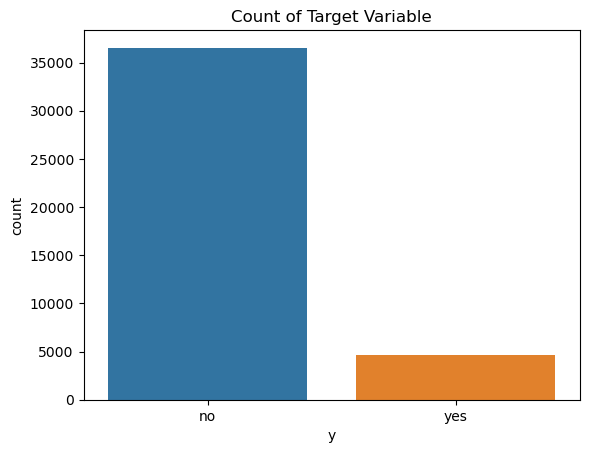

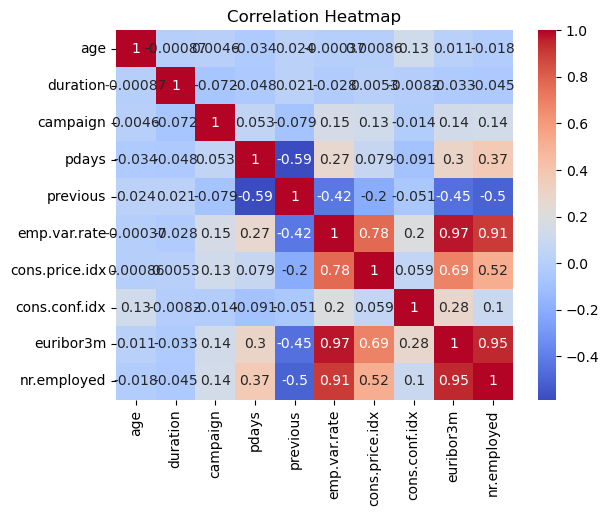

In [9]:
# Count plot for categorical column 'y'
sns.countplot(x='y', data=data)
plt.title('Count of Target Variable')
plt.show()

# Heatmap for correlations
# Ensure only numeric columns are passed for the correlation calculation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])  # Yes -> 1, No -> 0

In [13]:
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 40, 60, 100], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

In [17]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_group'],
      dtype='object')


In [19]:
from sklearn.preprocessing import StandardScaler

# Check available columns
print("Available columns in DataFrame:", data.columns)

# Adjust the numerical_features list based on actual column names
numerical_features = ['age', 'balance', 'duration', 'campaign']  # Update these as needed

# Check if all specified columns exist
missing_columns = [col for col in numerical_features if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Scale only if columns exist
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    print("Numerical features successfully scaled!")

Available columns in DataFrame: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_group'],
      dtype='object')
Missing columns: ['balance']


In [21]:
from sklearn.preprocessing import StandardScaler

# Define numerical features based on your DataFrame
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous']

# Check if all specified columns exist in the DataFrame
missing_columns = [col for col in numerical_features if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Scale the numerical features
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    print("Numerical features successfully scaled!")


Numerical features successfully scaled!


In [23]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1)  # Drop target
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                      'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Split data into features and target
X = data[categorical_features + numerical_features]
y = data['y']  # Replace with your actual target column

# Apply One-Hot Encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # Keep numerical features as is
)

X_processed = preprocessor.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Ensure the target is numeric
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

In [31]:
print(y.isnull().sum())  # Count missing values in y

0


In [35]:
y_train = y_train.map({'yes': 1, 'no': 0})  # Example mapping for categorical labels

In [39]:
print(y_train.head())  # Inspect target values
print(y_train.unique())  # Check unique values to ensure proper encoding

12556   NaN
35451   NaN
30592   NaN
17914   NaN
3315    NaN
Name: y, dtype: float64
[nan]


In [41]:
non_missing_indices = y_train.notnull()  # Ensure it's applied to the training labels
X_train = X_train[non_missing_indices]
y_train = y_train[non_missing_indices]

In [43]:
print(X_train.shape)  # Shape of training features
print(y_train.shape)  # Shape of training labels

(0, 53)
(0,)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
import numpy as np

# Ensure y_train is a Pandas Series for easier filtering
non_missing_indices = ~np.isnan(y_train)  # Boolean mask for non-missing values
X_train = X_train[non_missing_indices]
y_train = y_train[non_missing_indices]

In [51]:
import pandas as pd

if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

In [53]:
print(type(X_train))  # Should be <class 'numpy.ndarray'>
print(type(y_train))  # Should be <class 'pandas.Series'> or <class 'numpy.ndarray'>


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [55]:
print(X_train.shape)
print(y_train.shape)

(32950, 20)
(32950,)


In [57]:
print(X_train.index.equals(y_train.index))  # Should return True

True


In [65]:
model = LogisticRegression(solver='lbfgs', class_weight='balanced', random_state=42)

In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert X_test to a pandas DataFrame (if it's not already)
X_test_df = pd.DataFrame(X_test)

# Apply Label Encoding to categorical columns (assuming categorical features are in X_test)
label_encoder = LabelEncoder()

# Apply label encoding to each column (if necessary)
X_test_encoded = X_test_df.apply(lambda col: label_encoder.fit_transform(col) if col.dtypes == 'object' else col)

In [75]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming X_test is a numpy ndarray, you need to manually encode each categorical column
X_test_encoded = X_test.copy()  # Make a copy of X_test to avoid modifying the original data

# Loop through each column (if categorical)
for i in range(X_test.shape[1]):
    if isinstance(X_test[0, i], str):  # Check if the column is categorical
        X_test_encoded[:, i] = label_encoder.fit_transform(X_test[:, i])

# Now X_test_encoded should have label-encoded values

In [77]:
print(X_test_encoded[:5])  # Print the first 5 rows to check encoding

[[9 1 3 0 0 2 0 6 1 0 1.628993230905577 0.4347295768268762
  -0.5659219741930245 0.1954139001271294 1.6711360607672916 -1.8 92.893
  -46.2 1.299 5099.1]
 [11 1 7 1 2 0 1 6 2 1 1.4370753436063188 0.10303683859833311
  -0.2049085263557372 0.1954139001271294 -0.34949428419757467 1.1 93.994
  -36.4 4.86 5191.0]
 [1 1 2 0 0 0 0 6 0 0 -0.6740214166855213 -0.7956190684627197
  -0.5659219741930245 0.1954139001271294 1.6711360607672916 -1.8 92.893
  -46.2 1.313 5099.1]
 [0 1 3 0 0 0 1 4 0 1 -0.386144585736634 0.3730192999471472
  0.5171183693188373 0.1954139001271294 -0.34949428419757467 1.4 94.465
  -41.8 4.967 5228.1]
 [3 1 3 0 2 0 0 3 0 1 -1.249775078583296 -0.26722482268004055
  -0.2049085263557372 0.1954139001271294 -0.34949428419757467 1.4 93.918
  -42.7 4.963 5228.1]]


In [87]:
categorical_columns = ['column1', 'column2', 'column3']  

In [111]:
# Check for missing values in training data
print(X_train_encoded.isnull().sum())  # For each column in X_train_encoded
print(y_train.isnull().sum())  # For the target variable y_train

col1        0
col2        0
col3    32950
col4    32950
col5    32950
dtype: int64
0


In [113]:
# Drop rows with missing values in both X_train and X_test
X_train_clean = X_train_encoded.dropna()
y_train_clean = y_train[X_train_clean.index]  # Align y_train with the cleaned data

# Check how many samples are left
print(f"Number of rows after dropping missing values: {X_train_clean.shape[0]}")

Number of rows after dropping missing values: 0


In [121]:
import pandas as pd

# Align columns in X_test to match the X_train columns (if it's a pandas DataFrame)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_train_encoded.columns)

In [136]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Assume X_train and y_train are your features and target variable

# Step 1: One-Hot Encoding for categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

# Now X_train_smote and y_train_smote will be balanced with synthetic samples


In [134]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check if model is trained
if hasattr(model, 'coef_'):
    # Extract the coefficients (for binary classification, it's a 1D array)
    coefficients = model.coef_[0]

    # Create a DataFrame for better visualization
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': coefficients
    })

    # Sort the features by importance (absolute value of coefficients)
    feature_importance['importance'] = np.abs(feature_importance['importance'])
    feature_importance = feature_importance.sort_values(by='importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance based on Logistic Regression Coefficients')
    plt.show()
else:
    print("The model is not trained yet. Please train the model first.")

The model is not trained yet. Please train the model first.


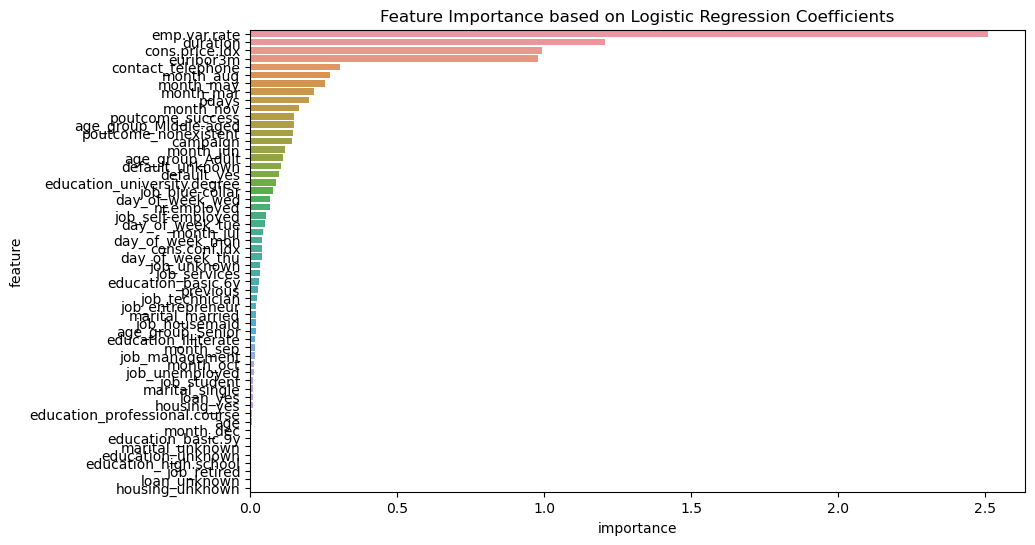

In [156]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the scaled data again
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model with more iterations
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train, y_train)

# Extract the coefficients after training
coefficients = model.coef_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': coefficients
})

# Sort the features by importance (absolute value of coefficients)
feature_importance['importance'] = np.abs(feature_importance['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.show()

In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
X = data.drop('y', axis=1)  # Features (drop target column 'y')
y = data['y']  # Target variable (the 'y' column)

In [162]:
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True avoids the dummy variable trap

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [168]:
model = LogisticRegression(max_iter=5000, random_state=42)

In [172]:
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

In [188]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

In [190]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)  # Train the model using training data

C:\Users\sammu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [192]:
coefficients = model.coef_[0]  # For binary classification, coefficients are stored in a 1D array

In [194]:
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': coefficients
})

In [196]:
feature_importance['importance'] = np.abs(feature_importance['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

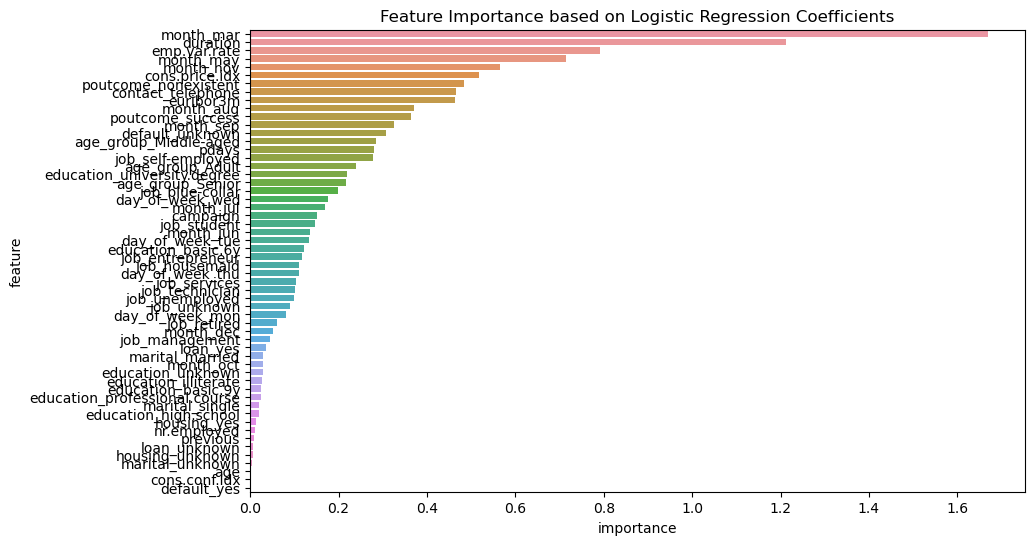

In [198]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.show()

In [200]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9118


In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.44      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



In [208]:
import joblib
joblib.dump(model, 'term_deposit_model.pkl')  # Save the trained model to a file

['term_deposit_model.pkl']

In [210]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load the trained model
model = joblib.load('term_deposit_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get the data as JSON
    # Assuming the input features are a list of values, such as [age, balance, ...]
    prediction = model.predict([data['features']])  # Predict using the model
    result = {'prediction': 'yes' if prediction[0] == 1 else 'no'}
    return jsonify(result)  # Return the prediction in JSON format

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\sammu\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [212]:
model = joblib.load('C:/Users/sammu/Downloads/Banking Data Analysis/term_deposit_model.pkl')


In [ ]:
app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
model = joblib.load('term_deposit_model.pkl')
print("Model loaded successfully!")

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
import os
print(os.listdir('.'))  # List files in the current directory

['.ipynb_checkpoints', 'app.py', 'bank-additional-full.csv', 'bank-additional.csv', 'bank-full.csv', 'bank-names.txt', 'bank.csv', 'BankCode.ipynb', 'BankTask.ipynb', 'logistic_model.pkl', 'term_deposit_model.pkl', 'Untitled.ipynb']


In [20]:
import pandas as pd

# Load the dataset with the correct delimiter
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Display the first few rows and the columns
print(data.head())
print(data.columns)


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

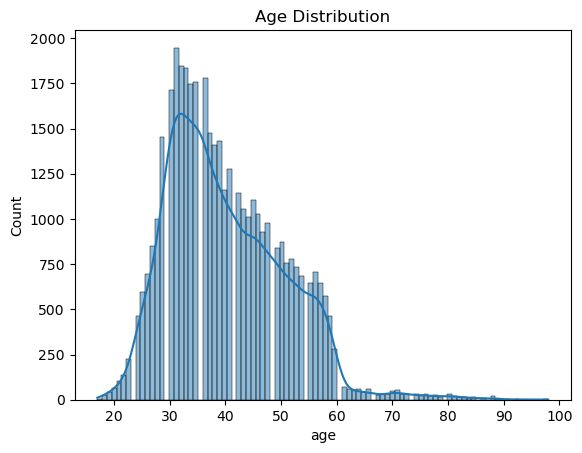

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['age'], kde=True)
plt.title("Age Distribution")
plt.show()

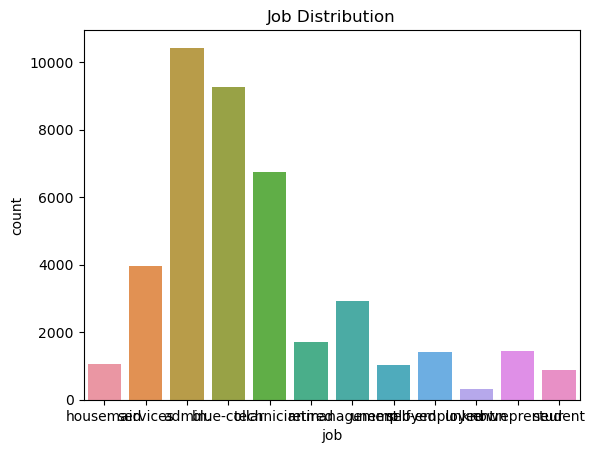

In [24]:
sns.countplot(x='job', data=data)
plt.title("Job Distribution")
plt.show()

In [26]:
missing_values = data.isnull().sum()

In [35]:
# Display the data types of the columns
print(data.dtypes)

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
Categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [37]:
# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns[:-1], drop_first=True)  # Exclude 'y'

In [39]:
# Feature set (drop the target variable)
X = data_encoded.drop(['y'], axis=1)

# Target variable
y = data_encoded['y']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluate the model
accuracy = logistic_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9104960750991341


C:\Users\sammu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
